In [ ]:
#Read in full dataset: 

import pandas as pd 

Full_Data = pd.read_csv('faa_airports_all_thin.csv')
Full_Data['DateTimeFlightDate'] = pd.to_datetime(Full_Data['FlightDate'])


Full_Data.head()




,Year,Month,DayofMonth,DayOfWeek,FlightDate,IATA_Code_Marketing_Airline,Origin,Dest,CRSDepTime,DepTime,...,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,Div1AirportID,DateTimeFlightDate
0,2022,4,3,7,2022-04-03,UA,CMH,ORD,1130,1128.0,...,1,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-03
1,2022,4,3,7,2022-04-03,UA,ORD,GRR,710,705.0,...,1,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-03
2,2022,4,3,7,2022-04-03,UA,MDT,ORD,1741,1731.0,...,1,594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-03
3,2022,4,3,7,2022-04-03,UA,RIC,ORD,1049,1043.0,...,1,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-03
4,2022,4,3,7,2022-04-03,UA,ORD,MDT,1400,1352.0,...,1,594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-03


In [ ]:
from plotnine import *

#Change all to ArrDelay

"""Pull all LAX flights"""

LAX_All = Full_Data[(Full_Data['Dest']=='LAX') | (Full_Data['Origin']=='LAX')]
#print(LAX_All.head())
LAX_Depart = Full_Data[Full_Data['Origin']=='LAX']

plot= (ggplot(LAX_All, aes(x='ArrDelayMinutes')) + geom_histogram(bins=10))
#plot.show()

"""Subset LAX dates for Thanksgiving"""
#LAX_Thanksgiving = LAX_Depart[(LAX_Depart['DateTimeFlightDate']>='2022-11-22') & (LAX_Depart['DateTimeFlightDate']<= '2022-11-27')]
LAX_Thanksgiving = LAX_Depart[(LAX_Depart['DateTimeFlightDate']=='2022-11-22') | (LAX_Depart['DateTimeFlightDate']=='2022-11-23') | (LAX_Depart['DateTimeFlightDate']=='2022-11-24') | (LAX_Depart['DateTimeFlightDate']=='2022-11-25') | (LAX_Depart['DateTimeFlightDate']=='2022-11-26') | (LAX_Depart['DateTimeFlightDate']== '2022-11-27')]

#LAX_Thanksgiving_Percent_Delay = (LAX_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index()
#LAX_Thanksgiving_Percent_Delay['PercentDelay'] = LAX_Thanksgiving_Percent_Delay[0]
#print(LAX_Thanksgiving_Percent_Delay)

"""Subset LAX dates for Christmas"""
LAX_Christmas = LAX_Depart[(LAX_Depart['DateTimeFlightDate'] >= '2022-12-22') & (LAX_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(LAX_Christmas)

"""Subset LAX dates for Eras Tour"""
LAX_Eras = LAX_All[(LAX_All['DateTimeFlightDate']>= '2023-8-2') & (LAX_All['DateTimeFlightDate']<= '2023-8-10')]  #August 3-5, August 8-9

LAX_NonHoliday1 = LAX_Depart[(LAX_Depart['DateTimeFlightDate'] >= '2022-4-1') & (LAX_Depart['DateTimeFlightDate'] < '2022-11-22')] 
LAX_NonHoliday2 = LAX_Depart[(LAX_Depart['DateTimeFlightDate'] > '2022-11-27') & (LAX_Depart['DateTimeFlightDate'] < '2022-12-22')]
LAX_NonHoliday3 = LAX_Depart[(LAX_Depart['DateTimeFlightDate'] < '2023-1-2') & (LAX_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_LAX = pd.concat([LAX_NonHoliday1, LAX_NonHoliday2, LAX_NonHoliday3])
Total_minutes_LAX = Total_NonHoliday_LAX[Total_NonHoliday_LAX['ArrDelayMinutes'] != 0]
Total_minutes_LAX = Total_minutes_LAX.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_LAX)



Origin
LAX    15.0
Name: ArrDelayMinutes, dtype: float64


In [19]:
from plotnine import *
import pandas as pd

"""Pull all DEN flights"""

DEN_All = Full_Data[(Full_Data['Dest']=='DEN') | (Full_Data['Origin']=='DEN')]
#print(DEN_All.head())
DEN_Depart = Full_Data[Full_Data['Origin']=='DEN']
#print(Den_Depart.head())

plot= (ggplot(DEN_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset DEN dates for Thanksgiving"""
#DEN_Thanksgiving = DEN_Depart[(DEN_Depart['DateTimeFlightDate']>='2022-11-22') & (DEN_Depart['DateTimeFlightDate']<= '2022-11-27')]
DEN_Thanksgiving = DEN_Depart[(DEN_Depart['DateTimeFlightDate']=='2022-11-22') | (DEN_Depart['DateTimeFlightDate']=='2022-11-23') | (DEN_Depart['DateTimeFlightDate']=='2022-11-24') | (DEN_Depart['DateTimeFlightDate']=='2022-11-25') | (DEN_Depart['DateTimeFlightDate']=='2022-11-26') | (DEN_Depart['DateTimeFlightDate']== '2022-11-27')]

#DEN_Thanksgiving_Percent_Delay = (DEN_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index()
#DEN_Thanksgiving_Percent_Delay['PercentDelay'] = DEN_Thanksgiving_Percent_Delay[0]
#print(DEN_Thanksgiving_Percent_Delay)

"""Subset DEN dates for Christmas"""
DEN_Christmas = DEN_Depart[(DEN_Depart['DateTimeFlightDate'] >= '2022-12-22') & (DEN_Depart['DateTimeFlightDate'] <= '2023-1-2')]

"""Subset DEN dates for Eras Tour"""
DEN_Eras = DEN_All[(DEN_All['DateTimeFlightDate']>= '2023-8-2') & (DEN_All['DateTimeFlightDate']<= '2023-8-10')]

DEN_NonHoliday1 = DEN_Depart[(DEN_Depart['DateTimeFlightDate'] >= '2022-4-1') & (DEN_Depart['DateTimeFlightDate'] < '2022-11-22')] 
DEN_NonHoliday2 = DEN_Depart[(DEN_Depart['DateTimeFlightDate'] > '2022-11-27') & (DEN_Depart['DateTimeFlightDate'] < '2022-12-22')]
DEN_NonHoliday3 = DEN_Depart[(DEN_Depart['DateTimeFlightDate'] < '2023-1-2') & (DEN_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_DEN = pd.concat([DEN_NonHoliday1, DEN_NonHoliday2, DEN_NonHoliday3])
Total_minutes_DEN = Total_NonHoliday_DEN[Total_NonHoliday_DEN['ArrDelayMinutes'] != 0]
Total_minutes_DEN = Total_minutes_DEN.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_DEN)


Origin
DEN    18.0
Name: ArrDelayMinutes, dtype: float64


In [20]:
"""Pull all LGA Flights"""

#from plotnine import *

#LGA_All = Full_Data[(Full_Data['Dest']=='LGA') | (Full_Data['Origin']=='LGA')]
#print(LGA_All.head())
#LGA_Depart = Full_Data[Full_Data['Origin']=='LGA']

#plot= (ggplot(LGA_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset LGA dates for Thanksgiving"""
#LGA_Thanksgiving = LGA_Depart[(LGA_Depart['DateTimeFlightDate']>='2022-11-22') & (LGA_Depart['DateTimeFlightDate']<= '2022-11-27')]
#CLT_Thanksgiving_Percent_Delay = CLT_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100
#print(LGA_Thanksgiving)

"""Subset LGA dates for Christmas"""
#LGA_Christmas = LGA_Depart[(LGA_Depart['DateTimeFlightDate'] >= '2022-12-22') & (LGA_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(LGA_Christmas)

"""Subset LGA dates for Eras Tour"""
#LGA_Eras = LGA_All[(LGA_All['DateTimeFlightDate']>= '2023-8-2') & (LGA_All['DateTimeFlightDate']<= '2023-8-10')]
#print(LGA_Eras)

'Subset LGA dates for Eras Tour'

In [21]:
"""Pull all ATL Flights"""

from plotnine import *

ATL_All = Full_Data[(Full_Data['Dest']=='ATL') | (Full_Data['Origin']=='ATL')]

ATL_Depart = Full_Data[Full_Data['Origin']=='ATL']

plot= (ggplot(ATL_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset ATL dates for Thanksgiving"""
#ATL_Thanksgiving = ATL_Depart[(ATL_Depart['DateTimeFlightDate']>='2022-11-22') & (ATL_Depart['DateTimeFlightDate']<= '2022-11-27')]
ATL_Thanksgiving = ATL_Depart[(ATL_Depart['DateTimeFlightDate']=='2022-11-22') | (ATL_Depart['DateTimeFlightDate']=='2022-11-23') | (ATL_Depart['DateTimeFlightDate']=='2022-11-24') | (ATL_Depart['DateTimeFlightDate']=='2022-11-25') | (ATL_Depart['DateTimeFlightDate']=='2022-11-26') | (ATL_Depart['DateTimeFlightDate']== '2022-11-27')]

#ATL_Thanksgiving_Percent_Delay = (ATL_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index()
#ATL_Thanksgiving_Percent_Delay['PercentDelay'] = ATL_Thanksgiving_Percent_Delay[0]
#print(ATL_Thanksgiving_Percent_Delay)

"""Subset ATL dates for Christmas"""
ATL_Christmas = ATL_Depart[(ATL_Depart['DateTimeFlightDate'] >= '2022-12-22') & (ATL_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(ATL_Christmas)

"""Subset LGA dates for Eras Tour"""
ATL_Eras = ATL_All[(ATL_All['DateTimeFlightDate']>= '2023-8-2') & (ATL_All['DateTimeFlightDate']<= '2023-8-10')]
#print(LGA_Eras)

ATL_NonHoliday1 = ATL_Depart[(ATL_Depart['DateTimeFlightDate'] >= '2022-4-1') & (ATL_Depart['DateTimeFlightDate'] < '2022-11-22')] 
ATL_NonHoliday2 = ATL_Depart[(ATL_Depart['DateTimeFlightDate'] > '2022-11-27') & (ATL_Depart['DateTimeFlightDate'] < '2022-12-22')]
ATL_NonHoliday3 = ATL_Depart[(ATL_Depart['DateTimeFlightDate'] < '2023-1-2') & (ATL_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_ATL = pd.concat([ATL_NonHoliday1, ATL_NonHoliday2, ATL_NonHoliday3])
Total_minutes_ATL = Total_NonHoliday_ATL[Total_NonHoliday_ATL['ArrDelayMinutes'] != 0]
Total_minutes_ATL = Total_minutes_ATL.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_ATL)


Origin
ATL    16.0
Name: ArrDelayMinutes, dtype: float64


In [22]:
"""Pull all ORD Flights"""

from plotnine import *

ORD_All = Full_Data[(Full_Data['Dest']=='ORD') | (Full_Data['Origin']=='ORD')]
#print(ORD_All.head())
ORD_Depart = Full_Data[Full_Data['Origin']=='ORD']

plot= (ggplot(ORD_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset ORD dates for Thanksgiving"""
#ORD_Thanksgiving = ORD_Depart[(ORD_Depart['DateTimeFlightDate']>='2022-11-22') & (ORD_Depart['DateTimeFlightDate']<= '2022-11-27')]
ORD_Thanksgiving = ORD_Depart[(ORD_Depart['DateTimeFlightDate']=='2022-11-22') | (ORD_Depart['DateTimeFlightDate']=='2022-11-23') | (ORD_Depart['DateTimeFlightDate']=='2022-11-24') | (ORD_Depart['DateTimeFlightDate']=='2022-11-25') | (ORD_Depart['DateTimeFlightDate']=='2022-11-26') | (ORD_Depart['DateTimeFlightDate']== '2022-11-27')]

#ORD_Thanksgiving_Percent_Delay = (ORD_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index()
#ORD_Thanksgiving_Percent_Delay['PercentDelay'] = ORD_Thanksgiving_Percent_Delay[0]
#print(ORD_Thanksgiving_Percent_Delay)

"""Subset ORD dates for Christmas"""
ORD_Christmas = ORD_Depart[(ORD_Depart['DateTimeFlightDate'] >= '2022-12-22') & (ORD_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(ORD_Christmas)

"""Subset ORD dates for Eras Tour"""
ORD_Eras = ORD_All[(ORD_All['DateTimeFlightDate']>= '2023-8-2') & (ORD_All['DateTimeFlightDate']<= '2023-8-10')]
#print(ORD_Eras)

ORD_NonHoliday1 = ORD_Depart[(ORD_Depart['DateTimeFlightDate'] >= '2022-4-1') & (ORD_Depart['DateTimeFlightDate'] < '2022-11-22')] 
ORD_NonHoliday2 = ORD_Depart[(ORD_Depart['DateTimeFlightDate'] > '2022-11-27') & (ORD_Depart['DateTimeFlightDate'] < '2022-12-22')]
ORD_NonHoliday3 = ORD_Depart[(ORD_Depart['DateTimeFlightDate'] < '2023-1-2') & (ORD_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_ORD = pd.concat([ORD_NonHoliday1, ORD_NonHoliday2, ORD_NonHoliday3])
Total_minutes_ORD = Total_NonHoliday_ORD[Total_NonHoliday_ORD['ArrDelayMinutes'] != 0]
Total_minutes_ORD = Total_minutes_ORD.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_ORD)


Origin
ORD    19.0
Name: ArrDelayMinutes, dtype: float64


In [23]:
"""Pull all PHX Flights"""

from plotnine import *

PHX_All = Full_Data[(Full_Data['Dest']=='PHX') | (Full_Data['Origin']=='PHX')]
#print(PHX_All.head())
PHX_Depart = Full_Data[Full_Data['Origin']=='PHX']

plot= (ggplot(PHX_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset PHX dates for Thanksgiving"""
#PHX_Thanksgiving = PHX_Depart[(PHX_Depart['DateTimeFlightDate']>='2022-11-22') & (PHX_Depart['DateTimeFlightDate']<= '2022-11-27')]
PHX_Thanksgiving = PHX_Depart[(PHX_Depart['DateTimeFlightDate']=='2022-11-22') | (PHX_Depart['DateTimeFlightDate']=='2022-11-23') | (PHX_Depart['DateTimeFlightDate']=='2022-11-24') | (PHX_Depart['DateTimeFlightDate']=='2022-11-25') | (PHX_Depart['DateTimeFlightDate']=='2022-11-26') | (PHX_Depart['DateTimeFlightDate']== '2022-11-27')]

#PHX_Thanksgiving_Percent_Delay = (PHX_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index()
#PHX_Thanksgiving_Percent_Delay['PercentDelay'] = PHX_Thanksgiving_Percent_Delay[0]
#print(PHX_Thanksgiving_Percent_Delay)

"""Subset PHX dates for Christmas"""
PHX_Christmas = PHX_Depart[(PHX_Depart['DateTimeFlightDate'] >= '2022-12-22') & (PHX_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(PHX_Christmas)

"""Subset PHX dates for Eras Tour"""
PHX_Eras = PHX_All[(PHX_All['DateTimeFlightDate']>= '2023-8-2') & (PHX_All['DateTimeFlightDate']<= '2023-8-10')]
#print(PHX_Eras)

PHX_NonHoliday1 = PHX_Depart[(PHX_Depart['DateTimeFlightDate'] >= '2022-4-1') & (PHX_Depart['DateTimeFlightDate'] < '2022-11-22')] 
PHX_NonHoliday2 = PHX_Depart[(PHX_Depart['DateTimeFlightDate'] > '2022-11-27') & (PHX_Depart['DateTimeFlightDate'] < '2022-12-22')]
PHX_NonHoliday3 = PHX_Depart[(PHX_Depart['DateTimeFlightDate'] < '2023-1-2') & (PHX_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_PHX = pd.concat([PHX_NonHoliday1, PHX_NonHoliday2, PHX_NonHoliday3])
Total_minutes_PHX = Total_NonHoliday_PHX[Total_NonHoliday_PHX['ArrDelayMinutes'] != 0]
Total_minutes_PHX = Total_minutes_PHX.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_PHX)


Origin
PHX    17.0
Name: ArrDelayMinutes, dtype: float64


In [24]:
"""Pull all DFW Flights"""

from plotnine import *

DFW_All = Full_Data[(Full_Data['Dest']=='DFW') | (Full_Data['Origin']=='DFW')]
#print(DFW_All.head())
DFW_Depart = Full_Data[Full_Data['Origin']=='DFW']

plot= (ggplot(DFW_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset DFW dates for Thanksgiving"""
#DFW_Thanksgiving = DFW_Depart[(DFW_Depart['DateTimeFlightDate']>='2022-11-22') & (DFW_Depart['DateTimeFlightDate']<= '2022-11-27')]
DFW_Thanksgiving = DFW_Depart[(DFW_Depart['DateTimeFlightDate']=='2022-11-22') | (DFW_Depart['DateTimeFlightDate']=='2022-11-23') | (DFW_Depart['DateTimeFlightDate']=='2022-11-24') | (DFW_Depart['DateTimeFlightDate']=='2022-11-25') | (DFW_Depart['DateTimeFlightDate']=='2022-11-26') | (DFW_Depart['DateTimeFlightDate']== '2022-11-27')]

#DFW_Thanksgiving_Percent_Delay = (DFW_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index()
#DFW_Thanksgiving_Percent_Delay['PercentDelay'] = DFW_Thanksgiving_Percent_Delay[0]
#print(DFW_Thanksgiving_Percent_Delay)

"""Subset DFW dates for Christmas"""
DFW_Christmas = DFW_Depart[(DFW_Depart['DateTimeFlightDate'] >= '2022-12-22') & (DFW_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(DFW_Christmas)

"""Subset DFW dates for Eras Tour"""
DFW_Eras = DFW_All[(DFW_All['DateTimeFlightDate']>= '2023-8-2') & (DFW_All['DateTimeFlightDate']<= '2023-8-10')]
#print(DFW_Eras)

DFW_NonHoliday1 = DFW_Depart[(DFW_Depart['DateTimeFlightDate'] >= '2022-4-1') & (DFW_Depart['DateTimeFlightDate'] < '2022-11-22')] 
DFW_NonHoliday2 = DFW_Depart[(DFW_Depart['DateTimeFlightDate'] > '2022-11-27') & (DFW_Depart['DateTimeFlightDate'] < '2022-12-22')]
DFW_NonHoliday3 = DFW_Depart[(DFW_Depart['DateTimeFlightDate'] < '2023-1-2') & (DFW_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_DFW = pd.concat([DFW_NonHoliday1, DFW_NonHoliday2, DFW_NonHoliday3])
Total_minutes_DFW = Total_NonHoliday_DFW[Total_NonHoliday_DFW['ArrDelayMinutes'] != 0]
Total_minutes_DFW = Total_minutes_DFW.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_DFW)

Origin
DFW    19.0
Name: ArrDelayMinutes, dtype: float64


In [25]:
"""Pull all MIA Flights"""

from plotnine import *

MIA_All = Full_Data[(Full_Data['Dest']=='MIA') | (Full_Data['Origin']=='MIA')]
#print(MIA_All.head())
MIA_Depart = Full_Data[Full_Data['Origin']=='MIA']

plot= (ggplot(MIA_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset MIA dates for Thanksgiving"""
#MIA_Thanksgiving = MIA_Depart[(MIA_Depart['DateTimeFlightDate']>='2022-11-22') & (MIA_Depart['DateTimeFlightDate']<= '2022-11-27')]
MIA_Thanksgiving = MIA_Depart[(MIA_Depart['DateTimeFlightDate']=='2022-11-22') | (MIA_Depart['DateTimeFlightDate']=='2022-11-23') | (MIA_Depart['DateTimeFlightDate']=='2022-11-24') | (MIA_Depart['DateTimeFlightDate']=='2022-11-25') | (MIA_Depart['DateTimeFlightDate']=='2022-11-26') | (MIA_Depart['DateTimeFlightDate']== '2022-11-27')]

#MIA_Thanksgiving_Percent_Delay = (MIA_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index()
#MIA_Thanksgiving_Percent_Delay['PercentDelay'] = MIA_Thanksgiving_Percent_Delay[0]
#print(MIA_Thanksgiving_Percent_Delay)

"""Subset MIA dates for Christmas"""
MIA_Christmas = MIA_Depart[(MIA_Depart['DateTimeFlightDate'] >= '2022-12-22') & (MIA_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(MIA_Christmas)

"""Subset MIA dates for Eras Tour"""
MIA_Eras = MIA_Depart[(MIA_All['DateTimeFlightDate']>= '2023-8-2') & (MIA_All['DateTimeFlightDate']<= '2023-8-10')]
#print(MIA_Eras)

MIA_NonHoliday1 = MIA_Depart[(MIA_Depart['DateTimeFlightDate'] >= '2022-4-1') & (MIA_Depart['DateTimeFlightDate'] < '2022-11-22')] 
MIA_NonHoliday2 = MIA_Depart[(MIA_Depart['DateTimeFlightDate'] > '2022-11-27') & (MIA_Depart['DateTimeFlightDate'] < '2022-12-22')]
MIA_NonHoliday3 = MIA_Depart[(MIA_Depart['DateTimeFlightDate'] < '2023-1-2') & (MIA_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_MIA = pd.concat([MIA_NonHoliday1, MIA_NonHoliday2, MIA_NonHoliday3])
Total_minutes_MIA = Total_NonHoliday_MIA[Total_NonHoliday_MIA['ArrDelayMinutes'] != 0]
Total_minutes_MIA = Total_minutes_MIA.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_MIA)

Origin
MIA    21.0
Name: ArrDelayMinutes, dtype: float64


C:\Users\mrossie\AppData\Local\Temp\5\ipykernel_22784\3515399060.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [26]:
"""Pull all LAS Flights"""

from plotnine import *

LAS_All = Full_Data[(Full_Data['Dest']=='LAS') | (Full_Data['Origin']=='LAS')]
#print(LAS_All.head())
LAS_Depart = Full_Data[Full_Data['Origin']=='LAS']

plot= (ggplot(LAS_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset LAS dates for Thanksgiving"""
#LAS_Thanksgiving = LAS_Depart[(LAS_Depart['DateTimeFlightDate']>='2022-11-22') & (LAS_Depart['DateTimeFlightDate']<= '2022-11-27')]
LAS_Thanksgiving = LAS_Depart[(LAS_Depart['DateTimeFlightDate']=='2022-11-22') | (LAS_Depart['DateTimeFlightDate']=='2022-11-23') | (LAS_Depart['DateTimeFlightDate']=='2022-11-24') | (LAS_Depart['DateTimeFlightDate']=='2022-11-25') | (LAS_Depart['DateTimeFlightDate']=='2022-11-26') | (LAS_Depart['DateTimeFlightDate']== '2022-11-27')]

#LAS_Thanksgiving_Percent_Delay = (LAS_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index()
#LAS_Thanksgiving_Percent_Delay['PercentDelay'] = LAS_Thanksgiving_Percent_Delay[0]
#print(LAS_Thanksgiving_Percent_Delay)

"""Subset LAS dates for Christmas"""
LAS_Christmas = LAS_Depart[(LAS_Depart['DateTimeFlightDate'] >= '2022-12-22') & (LAS_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(LAS_Christmas)

"""Subset LAS dates for Eras Tour"""
LAS_Eras = LAS_All[(LAS_All['DateTimeFlightDate']>= '2023-8-2') & (LAS_All['DateTimeFlightDate']<= '2023-8-10')]
#print(LAS_Eras)

LAS_NonHoliday1 = LAS_Depart[(LAS_Depart['DateTimeFlightDate'] >= '2022-4-1') & (LAS_Depart['DateTimeFlightDate'] < '2022-11-22')] 
LAS_NonHoliday2 = LAS_Depart[(LAS_Depart['DateTimeFlightDate'] > '2022-11-27') & (LAS_Depart['DateTimeFlightDate'] < '2022-12-22')]
LAS_NonHoliday3 = LAS_Depart[(LAS_Depart['DateTimeFlightDate'] < '2023-1-2') & (LAS_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_LAS = pd.concat([LAS_NonHoliday1, LAS_NonHoliday2, LAS_NonHoliday3])
Total_minutes_LAS = Total_NonHoliday_LAS[Total_NonHoliday_LAS['ArrDelayMinutes'] != 0]
Total_minutes_LAS = Total_minutes_LAS.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_LAS)

Origin
LAS    19.0
Name: ArrDelayMinutes, dtype: float64


In [27]:
"""Pull all MCO Flights"""

from plotnine import *

MCO_All = Full_Data[(Full_Data['Dest']=='MCO') | (Full_Data['Origin']=='MCO')]
#print(MCO_All.head())
MCO_Depart = Full_Data[Full_Data['Origin']=='MCO']

plot= (ggplot(MCO_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset MCO dates for Thanksgiving"""
#MCO_Thanksgiving = MCO_Depart[(MCO_Depart['DateTimeFlightDate']>='2022-11-22') & (MCO_Depart['DateTimeFlightDate']<= '2022-11-27')]
MCO_Thanksgiving = MCO_Depart[(MCO_Depart['DateTimeFlightDate']=='2022-11-22') | (MCO_Depart['DateTimeFlightDate']=='2022-11-23') | (MCO_Depart['DateTimeFlightDate']=='2022-11-24') | (MCO_Depart['DateTimeFlightDate']=='2022-11-25') | (MCO_Depart['DateTimeFlightDate']=='2022-11-26') | (MCO_Depart['DateTimeFlightDate']== '2022-11-27')]

#print(MCO_Thanksgiving)
#MCO_Thanksgiving_Percent_Delay = (MCO_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index()
#MCO_Thanksgiving_Percent_Delay['PercentDelay'] = MCO_Thanksgiving_Percent_Delay[0]
#print(MCO_Thanksgiving_Percent_Delay)

"""Subset MCO dates for Christmas"""
MCO_Christmas = MCO_Depart[(MCO_Depart['DateTimeFlightDate'] >= '2022-12-22') & (MCO_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(MCO_Christmas)

MCO_NonHoliday1 = MCO_Depart[(MCO_Depart['DateTimeFlightDate'] >= '2022-4-1') & (MCO_Depart['DateTimeFlightDate'] < '2022-11-22')] 
MCO_NonHoliday2 = MCO_Depart[(MCO_Depart['DateTimeFlightDate'] > '2022-11-27') & (MCO_Depart['DateTimeFlightDate'] < '2022-12-22')]
MCO_NonHoliday3 = MCO_Depart[(MCO_Depart['DateTimeFlightDate'] < '2023-1-2') & (MCO_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_MCO = pd.concat([MCO_NonHoliday1, MCO_NonHoliday2, MCO_NonHoliday3])
Total_minutes_MCO = Total_NonHoliday_MCO[Total_NonHoliday_MCO['ArrDelayMinutes'] != 0]
Total_minutes_MCO = Total_minutes_MCO.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_MCO)



Origin
MCO    23.0
Name: ArrDelayMinutes, dtype: float64


In [28]:
"""Pull all CLT Flights"""

from plotnine import *

CLT_All = Full_Data[(Full_Data['Dest']=='CLT') | (Full_Data['Origin']=='CLT')]
#print(CLT_All.head())
CLT_Depart = Full_Data[Full_Data['Origin']=='CLT']


plot= (ggplot(CLT_All, aes(x='ArrDelayMinutes')) +geom_histogram(bins=10))
#plot.show()

"""Subset CLT dates for Thanksgiving"""
#CLT_Thanksgiving = CLT_Depart[(CLT_Depart['DateTimeFlightDate']>='2022-11-22') & (CLT_Depart['DateTimeFlightDate']<= '2022-11-27')]
CLT_Thanksgiving = CLT_Depart[(CLT_Depart['DateTimeFlightDate']=='2022-11-22') | (CLT_Depart['DateTimeFlightDate']=='2022-11-23') | (CLT_Depart['DateTimeFlightDate']=='2022-11-24') | (CLT_Depart['DateTimeFlightDate']=='2022-11-25') | (CLT_Depart['DateTimeFlightDate']=='2022-11-26') | (CLT_Depart['DateTimeFlightDate']== '2022-11-27')]


#CLT_Thanksgiving_Percent_Delay = (CLT_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index() 
#CLT_Thanksgiving_Percent_Delay['PercentDelay'] = CLT_Thanksgiving_Percent_Delay[0]

#CLT_Thanksgiving_Percent_Delay.rename(columns={0:'PercentDelay'})
#print(CLT_Thanksgiving_Percent_Delay.columns)
#print(CLT_Thanksgiving_Percent_Delay)

#print(CLT_Thanksgiving)

"""Subset CLT dates for Christmas"""
CLT_Christmas = CLT_Depart[(CLT_Depart['DateTimeFlightDate'] >= '2022-12-22') & (CLT_Depart['DateTimeFlightDate'] <= '2023-1-2')]
#print(CLT_Christmas)


CLT_NonHoliday1 = CLT_Depart[(CLT_Depart['DateTimeFlightDate'] >= '2022-4-1') & (CLT_Depart['DateTimeFlightDate'] < '2022-11-22')] 
CLT_NonHoliday2 = CLT_Depart[(CLT_Depart['DateTimeFlightDate'] > '2022-11-27') & (CLT_Depart['DateTimeFlightDate'] < '2022-12-22')]
CLT_NonHoliday3 = CLT_Depart[(CLT_Depart['DateTimeFlightDate'] < '2023-1-2') & (CLT_Depart['DateTimeFlightDate'] <= '2023-3-31')]

Total_NonHoliday_CLT = pd.concat([CLT_NonHoliday1, CLT_NonHoliday2, CLT_NonHoliday3])
Total_minutes_CLT = Total_NonHoliday_CLT[Total_NonHoliday_CLT['ArrDelayMinutes'] != 0]
Total_minutes_CLT = Total_minutes_CLT.groupby('Origin')['ArrDelayMinutes'].median()
print(Total_minutes_CLT)



Origin
CLT    19.0
Name: ArrDelayMinutes, dtype: float64


In [29]:
#MEDIANS, arrdelay holiday - arrdealy non-holiday


In [30]:
top_ten_airports = ['ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'CLT', 'MCO', 'LAS', 'PHX', 'MIA']

for airport in top_ten_airports:
    outbound_flights_df = all_arrivals_to_top_ten[all_arrivals_to_top_ten['Origin'] == airport]
    
    outbound_summary = inbound_flights_df.groupby('FlightDate').agg(
        
        date_time_flight_date = ('DateTimeFlightDate', 'first'),
        outbound_flights = ('Flights', 'count'),
        
        # Summarizing the daily number and percent of inbound flights that were delayed departing from their origin airport. 
        # The FAA considers a "delayed flight" to be one that has a delay of >= 15min, so delays were summarized both for flights featuring any delay, and only those fitting the 15min+ definition.
        # Note that these calculations use DepDelayMinutes, which sets all early departures to 0 (otherwise these would have negative values)
        outbound_flights_with_departure_delay_num = ('DepDelayMinutes', lambda x: (x > 0).sum()),
       CLT_Thanksgiving_Percent_Delay = (CLT_Thanksgiving.groupby('DayOfWeek').apply(lambda x: (x['ArrDelayMinutes']!=0).sum()/len(x)) *100).reset_index() 


_IncompleteInputError: incomplete input (2173714231.py, line 15)

Origin
ATL    13.0
CLT    15.0
DEN    12.0
DFW    20.0
LAS    14.0
LAX    11.0
MCO    20.0
MIA    22.0
ORD    14.0
PHX    11.0
Name: ArrDelayMinutes, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



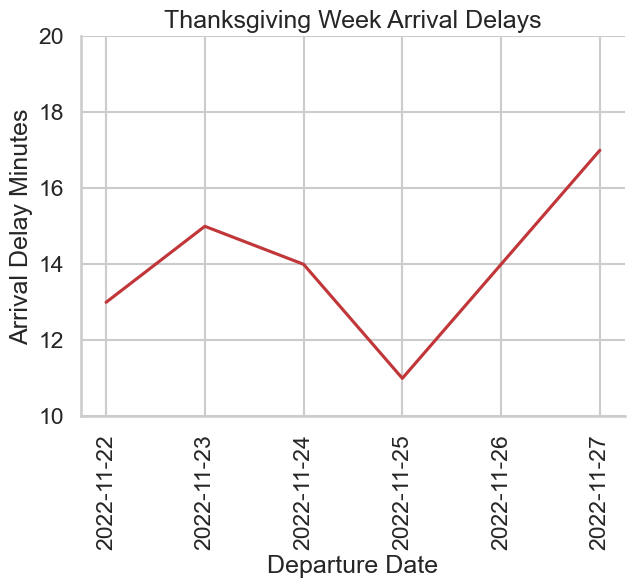

In [ ]:
"""Visualize Thanksgiving delays"""

from plotnine import *
import seaborn as sns 
import matplotlib.pyplot as plt

Total_Thanksgiving = pd.concat([LAX_Thanksgiving,DEN_Thanksgiving,CLT_Thanksgiving,ATL_Thanksgiving,ORD_Thanksgiving,PHX_Thanksgiving,DFW_Thanksgiving,MIA_Thanksgiving,LAS_Thanksgiving,MCO_Thanksgiving])
Total_Thanksgiving_Filtered = Total_Thanksgiving[Total_Thanksgiving['ArrDelayMinutes'] != 0]

#print(Total_Thanksgiving.info())
#plot_Thanksgiving_Percents = (ggplot(Total_Thanksgiving,aes(x='DayOfWeek',y='PercentDelay'))+geom_point()+facet_wrap())
#plot_Thanksgiving_Percents.show()

Total_Thanksgiving = Total_Thanksgiving.sort_values('DateTimeFlightDate')
Thanksgiving_Median = Total_Thanksgiving[Total_Thanksgiving['ArrDelayMinutes'] != 0]
Thanksgiving_Median = Thanksgiving_Median.groupby('Origin')['ArrDelayMinutes'].median()
print(Thanksgiving_Median)

Top_3_Bottom_3_Thanksgiving = pd.concat([DFW_Thanksgiving,MCO_Thanksgiving,LAS_Thanksgiving,LAX_Thanksgiving,PHX_Thanksgiving,ATL_Thanksgiving])
Top_3_Bottom_3_Thanksgiving = Top_3_Bottom_3_Thanksgiving.sort_values('DateTimeFlightDate')

#plot_experiment = (ggplot(CLT_Thanksgiving_Percent_Delay,aes(x='DayOfWeek',y='0')) +geom_bar())
#plot_experiment.show()

#plot_Thanksgiving = (ggplot(Total_Thanksgiving, aes(x='DateTimeFlightDate',y='ArrDelayMinutes',color='Origin'))+geom_point()+geom_jitter()+facet_wrap('Origin'))
#plot_Thanksgiving.show()

#plot_Thanksgiving_bar = (ggplot(Total_Thanksgiving,aes(x='DayOfWeek',y='ArrDelayMinutes',color='Origin'))+geom_bar(y='identity'))
#plot_Thanksgiving_bar.show()

#sns.scatterplot(x='FlightDate', y='ArrDelayMinutes', data=Total_Thanksgiving, hue='Origin')
#plt.show()

#sns.countplot(x='ArrDelayMinutes', data=Total_Thanksgiving, hue='Origin')
#plt.show()

#sns.relplot(x='FlightDate',y='ArrDelayMinutes',data=Total_Thanksgiving,kind='scatter',col='Origin')
#plt.show()


"""Overall distribution of Thanksgiving as a whole"""
#sns.catplot(x='FlightDate',y='ArrDelayMinutes', data=Total_Thanksgiving, kind='bar', ci=None, order=Total_Thanksgiving['DateTimeFlightDate'])
#plt.xticks(rotation=90)
#plt.title('Arrival Delays Across Top Airports for Thanksgiving Week')
#plt.xlabel('Departure Date')
#plt.ylabel('Arrival Delay Minutes')
#plt.show()

sns.relplot(x='DateTimeFlightDate', y='ArrDelayMinutes', data=Total_Thanksgiving_Filtered, kind='line', ci=None, estimator='median', aspect=1.4) #hue= regular week?
plt.xticks(rotation=90)
plt.title('Thanksgiving Week Arrival Delays')
plt.xlabel('Departure Date')
plt.ylabel('Arrival Delay Minutes')
plt.ylim(10,20)
plt.show()

#sns.relplot(x='FlightDate',y='ArrDelayMinutes', data=Total_Thanksgiving, kind='line', hue='Origin', ci=None)
#plt.xticks(rotation=90)
#plt.title('Arrival Delays at Top Ten Airports during Thanksgiving Week')
#plt.show()

#sns.relplot(x='FlightDate',y='ArrDelayMinutes', data=Top_3_Bottom_3_Thanksgiving, kind='line', hue='Origin', ci=None)
#plt.xticks(rotation=90)
#plt.title('Top 3, Bottom 3 Thanksgiving')
#sns.set_context('talk')
#sns.set_style('whitegrid')
#sns.set_palette('RdBu')
#plt.show()

#sns.relplot(x='FlightDate', y='ArrDelayMinutes', data=Top_3_Bottom_3_Thanksgiving, kind='line', hue='Origin',ci=None)
#plt.xticks(rotation=90)
#plt.xlabel('Flight Date')
#plt.ylabel('Arrival Delay in Minutes')
#plt.title('Top 3, Bottom 3 Thanksgiving')
#sns.set_palette('RdBu')
#plt.show()

 # Includes Nov 22, 23, 24, 25, 26, 27
 # Make a linegraph of delay times for all airports
 # Use AIRPORT_Thanksgiving for each airport







In [ ]:
Total_Christmas = pd.concat([LAX_Christmas,DEN_Christmas,CLT_Christmas,ATL_Christmas,ORD_Christmas,PHX_Christmas,DFW_Christmas,MIA_Christmas,LAS_Christmas,MCO_Christmas])

grouped_data_for_median = Total_Christmas.groupby(['DayOfWeek'])["ArrDelayMinutes"].median()
grouped_data_for_median

DayOfWeek
1    11.0
2     7.0
3     0.0
4     6.0
5     9.0
6     5.0
7     0.0
Name: ArrDelayMinutes, dtype: float64

Origin
ATL    26.0
CLT    23.0
DEN    43.0
DFW    29.0
LAS    29.0
LAX    25.0
MCO    36.0
MIA    27.0
ORD    32.0
PHX    26.0
Name: ArrDelayMinutes, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



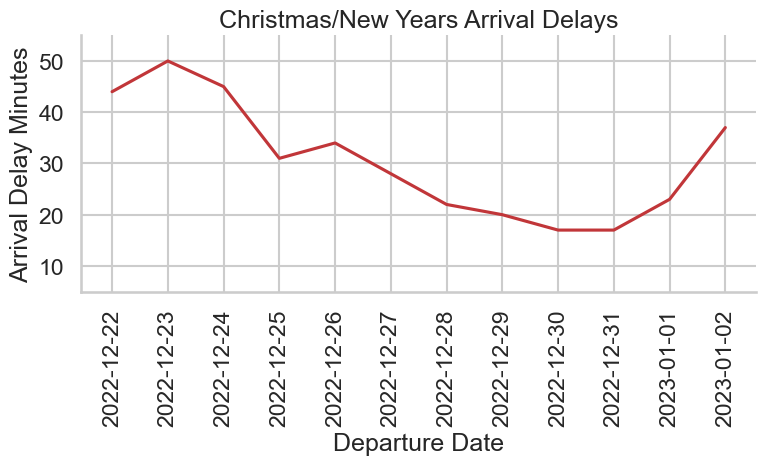

In [ ]:
#Subset Christmas through New Years --> visualize delays

from plotnine import *
import matplotlib.dates as mdates

Total_Christmas = pd.concat([LAX_Christmas,DEN_Christmas,CLT_Christmas,ATL_Christmas,ORD_Christmas,PHX_Christmas,DFW_Christmas,MIA_Christmas,LAS_Christmas,MCO_Christmas])
Total_Christmas_Filtered = Total_Christmas[Total_Christmas['ArrDelayMinutes'] != 0]
Christmas_Median = Total_Christmas[Total_Christmas['ArrDelayMinutes'] != 0]
Christmas_Median = Christmas_Median.groupby('Origin')['ArrDelayMinutes'].median()
print(Christmas_Median)

#print(Total_Thanksgiving.info())

#MCO, DFW, LAX = worst 3?
Top_3_Bottom_3_Christmas = pd.concat([DFW_Christmas,MCO_Christmas,LAS_Christmas,LAX_Christmas,PHX_Christmas,ATL_Christmas])

#plot_Christmas = (ggplot(Total_Christmas, aes(x='DateTimeFlightDate',y='ArrDelayMinutes',color='Origin'))+geom_point()+geom_jitter()+facet_wrap('Origin'))
#plot_Christmas.show()

sns.relplot(x='DateTimeFlightDate', y='ArrDelayMinutes', data=Total_Christmas_Filtered, kind='line', ci=None, estimator='median', aspect=1.6) #hue= regular week?
plt.xticks(rotation=90)
plt.title('Christmas/New Years Arrival Delays')
plt.xlabel('Departure Date')
plt.ylabel('Arrival Delay Minutes')
plt.ylim(5,55)
plt.tight_layout()
plt.xticks(Total_Christmas_Filtered['DateTimeFlightDate'].unique())
#xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.show()

#sns.catplot(x='FlightDate',y='ArrDelayMinutes', data=Total_Christmas, kind='bar', ci=None)
#plt.xticks(rotation=90)
#plt.title('Arrival Delays Across Top Airports Christmas - New Years')
#plt.show()

#sns.catplot(x='FlightDate',y='ArrDelayMinutes', data=Total_Christmas, kind='bar', hue='Origin', ci=None)
#plt.xticks(rotation=90)
#plt.title('Arrival Delays at Top Ten Airports Christmas - New Years')
#plt.show()

#sns.catplot(x='FlightDate',y='ArrDelayMinutes', data=Top_3_Bottom_3_Christmas, kind='bar', hue='Origin', ci=None)
#plt.xticks(rotation=90)
#plt.title('Top 3, Bottom 3 Christmas/New Years')
#sns.set_context('talk')
#sns.set_style('whitegrid')
#sns.set_palette('RdBu')
#plt.show()

#sns.relplot(x='FlightDate',y='ArrDelayMinutes', data=Top_3_Bottom_3_Christmas, kind='line', hue='Origin', ci=None)
#plt.xticks(rotation=90)
#plt.title('Top 3, Bottom 3, Christmas/New Years')
#plt.show()

C:\Users\mrossie\AppData\Local\Temp\5\ipykernel_16860\614866436.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



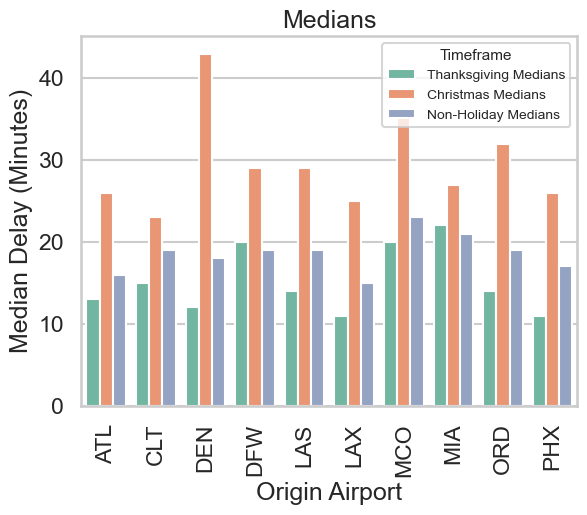

In [ ]:
"""Side-by-side Barchart of Medians non-holiday, thanksgiving, christmas"""
import pandas as pd

#Total_minutes_C (median delays for christmas)
#Thanksgiving_Median (median delays for thanksgiving)

NonHoliday_Medians = pd.concat([Total_minutes_CLT,Total_minutes_ATL, Total_minutes_DEN, Total_minutes_DFW, Total_minutes_LAS, Total_minutes_LAX, Total_minutes_MCO, Total_minutes_MIA, Total_minutes_ORD, Total_minutes_PHX])

df_combined_medians = pd.DataFrame({'Christmas Medians': Christmas_Median, 'Thanksgiving Medians': Thanksgiving_Median, 'Non-Holiday Medians': NonHoliday_Medians}).reset_index()
#print(df_combined_medians)

df_delays_long = df_combined_medians.melt(id_vars='Origin', value_vars=['Thanksgiving Medians', 'Christmas Medians', 'Non-Holiday Medians'], var_name='Timeframe', value_name= 'Median_Delay_Minutes')
#print(df_delays_long)

custom_palette = {'Christmas Medians': 'red',
           'Thanksgiving Medians': 'green',
           'Non-Holiday Medians': 'blue'}

sns.barplot(x='Origin', y='Median_Delay_Minutes', data=df_delays_long, hue='Timeframe', ci=None)
plt.xticks(rotation=90)
plt.title('Medians')
sns.set_context('talk')
sns.set_style('whitegrid')
plt.xlabel('Origin Airport')
plt.ylabel('Median Delay (Minutes)')
sns.set_palette('Set2')
plt.legend(title= 'Timeframe', fontsize= 10, title_fontsize='11', loc= 'upper right')
plt.show()



In [ ]:
#Subset week of Eras tour -- visualize delays
#Compare Eras Tour Days to Regular Days to see if there's a noticeable difference

In [ ]:
#weighted
import numpy as np

Thnks_Weight = len(Total_Thanksgiving)/(len(Total_Christmas) + len(Total_Thanksgiving))
Christmas_Weight = len(Total_Christmas)/(len(Total_Christmas) + len(Total_Thanksgiving))

print(Thnks_Weight)
print(Christmas_Weight)

weighted_Thnks_rankings= np.array([7,8.5,5.5,4,3,8.5,1.5,10,5.5,1.5]) *0.33
weighted_Christmas_rankings = np.array([1,9,6.5,3.5,10,6.5,2,5,8,5.5]) *0.67

print(weighted_Thnks_rankings)
print(weighted_Christmas_rankings)

new_holiday_ranks = weighted_Christmas_rankings + weighted_Thnks_rankings
print(new_holiday_ranks)

0.330232104544568
0.669767895455432
[2.31  2.805 1.815 1.32  0.99  2.805 0.495 3.3   1.815 0.495]
[0.67  6.03  4.355 2.345 6.7   4.355 1.34  3.35  5.36  3.685]
[2.98  8.835 6.17  3.665 7.69  7.16  1.835 6.65  7.175 4.18 ]


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

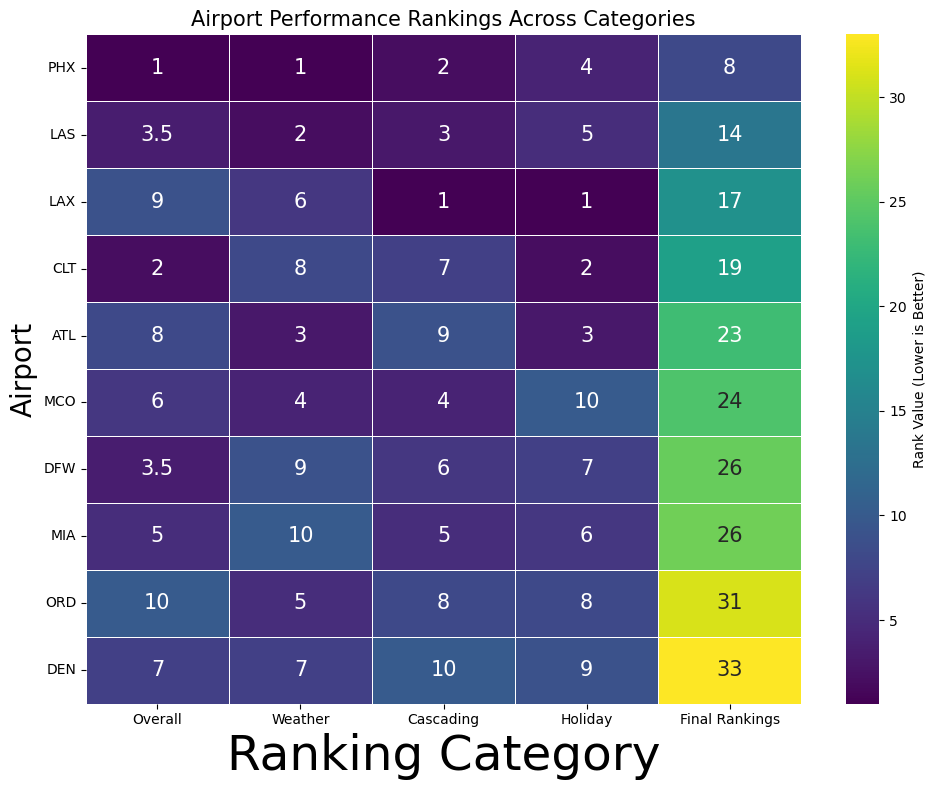

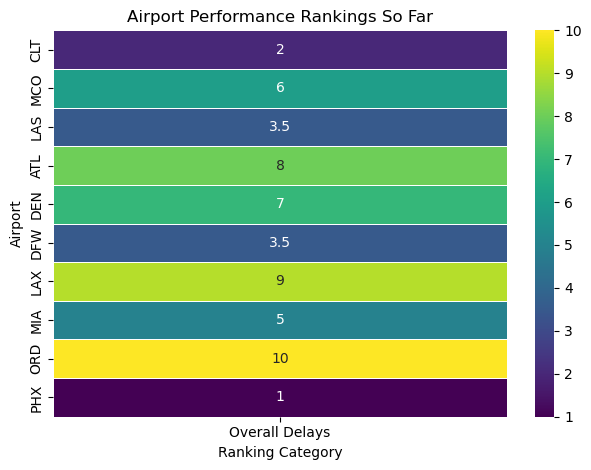

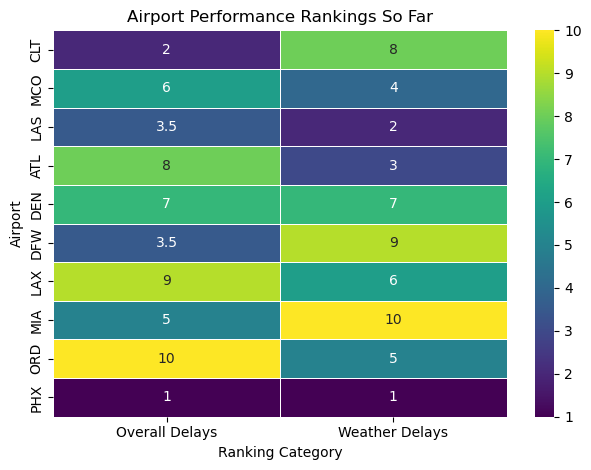

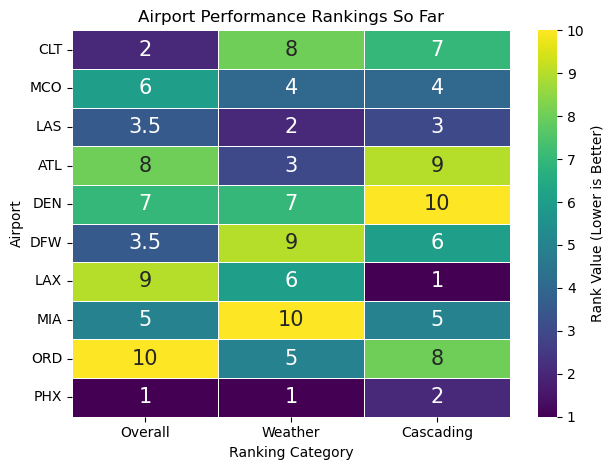

In [49]:
"""Heatmap for Rankings and Transitions"""

airport_names = ['CLT', 'MCO', 'LAS', 'ATL', 'DEN', 'DFW', 'LAX', 'MIA', 'ORD', 'PHX']

overall_delay_ranks = [2,6,3.5,8,7,3.5,9,5,10,1]
weather_delay_ranks = [8,4,2,3,7,9,6,10,5,1]
cascading_delay_ranks = [7,4,3,9,10,6,1,5,8,2] 
holiday_delay_ranks = [2,10,5,3,9,7,1,6,8,4]
#thanksgiving_delay_ranks = [7,8.5,5.5,4,3,8.5,1.5,10,5.5,1.5]
#christmas_delay_ranks = [1,9,6.5,3.5,10,6.5,2,5,8,5.5]
#final_rankings = [] Calculated by computer later

df_rankings_total = pd.DataFrame({'Airport': airport_names, 
                            'Overall': overall_delay_ranks,
                            'Weather': weather_delay_ranks,
                            'Cascading': cascading_delay_ranks,
                            'Holiday': holiday_delay_ranks,
                            })

df_rankings_total['Final Rankings']= df_rankings_total[['Overall', 'Weather', 'Cascading', 'Holiday']].sum(axis=1)

df_total_rankings_sorted = df_rankings_total.sort_values(by='Final Rankings', ascending= True)
df_total_rankings_sorted= df_total_rankings_sorted.set_index('Airport')

#plt.figure(figsize=(10,10)) #??
plt.figure(figsize=(10, 8))
annot_font_size = 15

#sns.heatmap(df_total_rankings_sorted, annot=True, cmap='viridis', linewidths=.7, linecolor='white', cbar=True) #cbar_kws{'label':'Rank Value (Lower is Better)'}
sns.heatmap(df_total_rankings_sorted,
            annot=True,
            #fmt=".1f", # Format annotations to one decimal place if they are floats
            cmap='viridis',
            linewidths=.7,
            linecolor='white',
            cbar=True,
            cbar_kws={'label':'Rank Value (Lower is Better)'}, # Corrected cbar_kws usage
            annot_kws={"size": annot_font_size} # Apply font size to annotations
           )
plt.title('Airport Performance Rankings Across Categories', fontsize= 15)
plt.xlabel('Ranking Category', fontsize=35)
plt.ylabel('Airport', fontsize=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#"""Need these to add up, though. So one by one:"""
df_rankings_1 = pd.DataFrame({'Airport': airport_names, 
                            'Overall Delays': overall_delay_ranks})
df_rankings_2 = pd.DataFrame({'Airport': airport_names, 
                            'Overall Delays': overall_delay_ranks,
                            'Weather Delays': weather_delay_ranks})
df_rankings_3 = pd.DataFrame({'Airport': airport_names, 
                            'Overall': overall_delay_ranks,
                            'Weather': weather_delay_ranks,
                           'Cascading': cascading_delay_ranks})

df_rankings_1 = df_rankings_1.set_index('Airport')
df_rankings_2 = df_rankings_2.set_index('Airport')
df_rankings_3 = df_rankings_3.set_index('Airport')

sns.heatmap(df_rankings_1, annot=True, cmap='viridis', linewidths=.7, linecolor='white', cbar=True) #cbar=True, cbar_kws{'label':'Rank Value (Lower is Better)'
plt.title('Airport Performance Rankings So Far') #fontsize=
plt.xlabel('Ranking Category')
plt.ylabel('Airport')
plt.tight_layout()
plt.show()

sns.heatmap(df_rankings_2, annot=True, cmap='viridis', linewidths=.7, linecolor='white', cbar=True) #cbar=True, cbar_kws{'label':'Rank Value (Lower is Better)'
plt.title('Airport Performance Rankings So Far') #fontsize=
plt.xlabel('Ranking Category')
plt.ylabel('Airport')
plt.tight_layout()
plt.show()

#sns.heatmap(df_rankings_3, annot=True, cmap='viridis', linewidths=.7, linecolor='white', cbar=True) #cbar=True, cbar_kws{'label':'Rank Value (Lower is Better)'
sns.heatmap(df_rankings_3,
            annot=True,
            #fmt=".1f", # Format annotations to one decimal place if they are floats
            cmap='viridis',
            linewidths=.7,
            linecolor='white',
            cbar=True,
            cbar_kws={'label':'Rank Value (Lower is Better)'}, # Corrected cbar_kws usage
            annot_kws={"size": annot_font_size} # Apply font size to annotations
           )
plt.title('Airport Performance Rankings So Far') #fontsize=
plt.xlabel('Ranking Category')
plt.ylabel('Airport')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()








